In [1]:
import sympy as sp
import numpy as np
from IPython.display import Image

In [2]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
r_0, r_L0, r_R0, e_0, Omega_0, delta_0, delta_R, delta_L = sp.symbols("r_0, r_L0, r_R0, e_0, Omega_0, delta_0, delta_R, delta_L")

### 2. Both Wheels Having Same Cone Angle but Different Nominal Radius in Centred Position (at t = 0)

In [4]:
delta_0 = (np.pi/180)*3
e_0 = 0.7
r_L0 = np.array([0.4, 0.44, 0.48, 0.52, 0.56])
r_R0 = np.array([0.4, 0.4, 0.4, 0.4, 0.4])
Omega_0 = 73

In [5]:
c1 = (Omega_0**2*(r_L0 + r_R0)**2)/4
c2 = r_L0 - r_R0
c3 = 2*delta_0
c4 = 2*delta_0
c5 = r_L0 - r_R0
c6 = e_0*(r_L0 + r_R0)

In [6]:
legend = ["r [L0, R0] = [0.4, 0.40] m", "r [L0, R0] = [0.44, 0.40] m", "r [L0, R0] = [0.48, 0.40] m", "r [L0, R0] = [0.52, 0.40] m", "r [L0, R0] = [0.56, 0.40] m"]
color = ["y-", "r-", "bo", "g-.", "k*"]

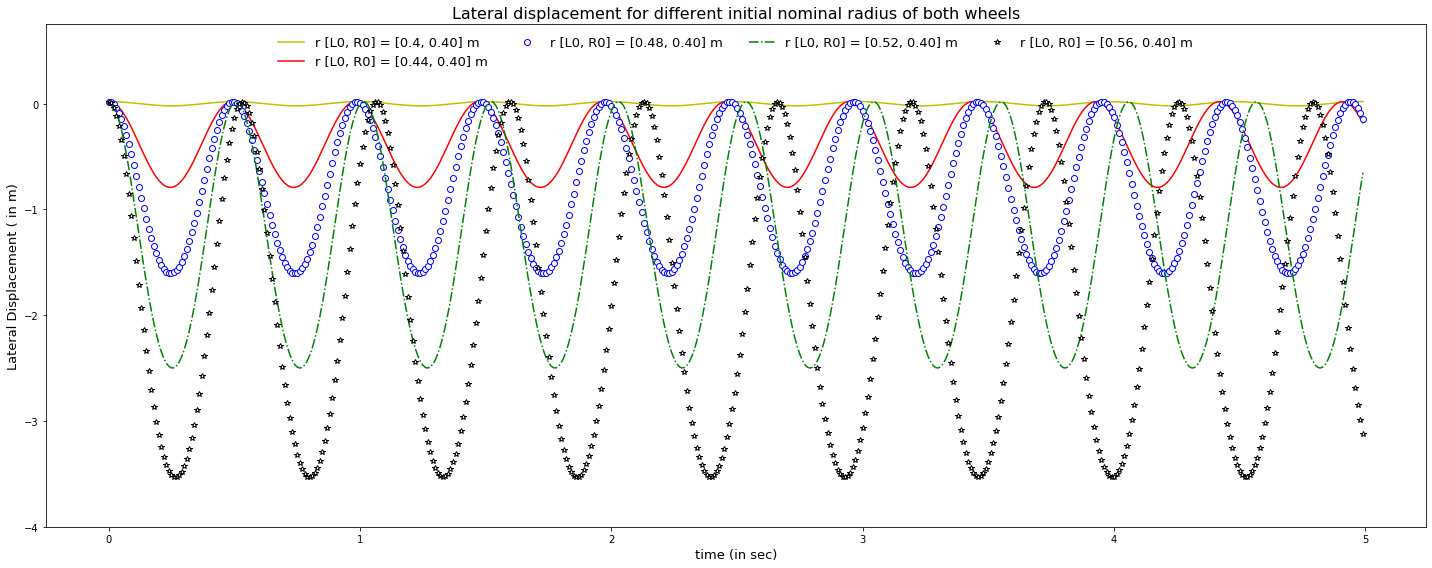

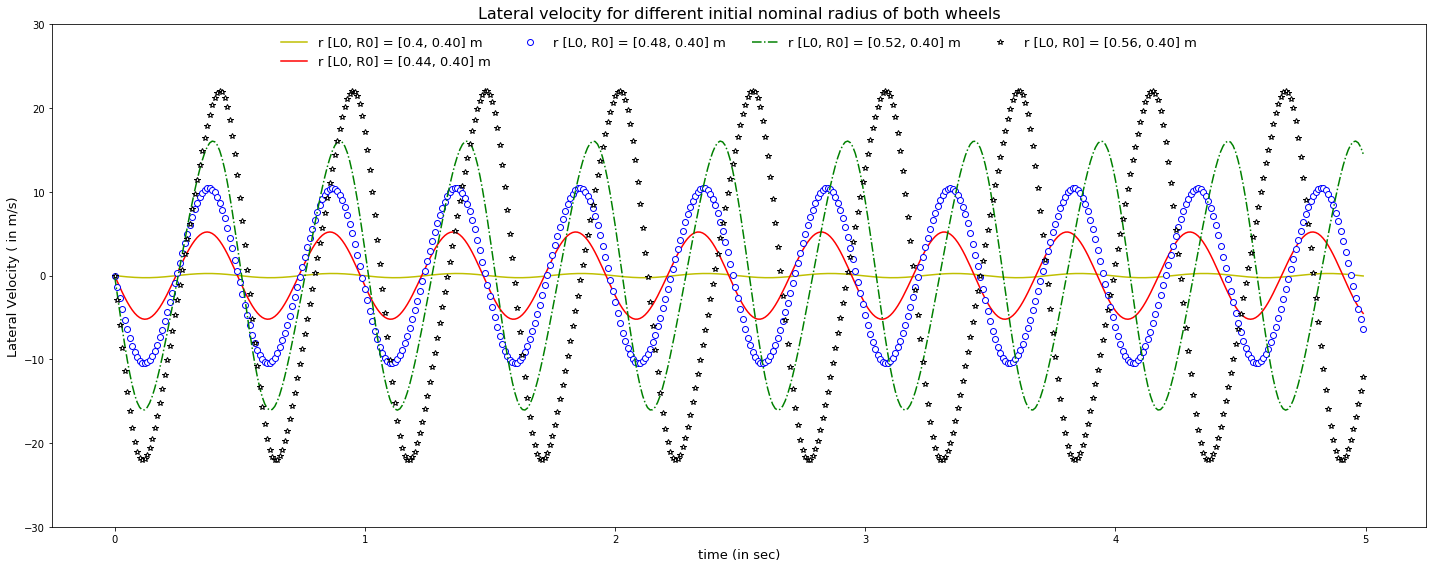

In [7]:
def f(Y, t, params):
    y, v = Y # unpack current values of y
    C1, C2, C3, C4, C5, C6 = params # unpack parameters
    derivs = [v, -(C1*C2 + C1*C3*y)/(C4*y**2 + C5*y + C6)] # list of dy/dt=f functions
    return derivs

# Initial values
y0 = 0.02 # initial lateral displacement
v0 = 0 # initial lateral velocity

# Bundle initial conditions for ODE solver
Y0 = [y0, v0]

# Make time array for solution
tStop = 5
tInc = 0.01
t = np.arange(0., tStop, tInc)

plt.figure(1, figsize = (20,8))

for i in [0, 1, 2, 3, 4]:
    C1 = c1[i]
    C2 = c2[i]
    C3 = c3
    C4 = c4
    C5 = c5[i]
    C6 = c6[i]
    
    params = [C1, C2, C3, C4, C5, C6]

    psoln4 = odeint(f, Y0, t, args=(params,))
    plt.plot(t, psoln4[:,0], color[i], label = legend[i], markerfacecolor='white')
    plt.xlabel('time (in sec)', fontsize=13)
    plt.ylabel('Lateral Displacement ( in m)', fontsize=13)
    plt.ylim(-4, 0.75)
    plt.legend(loc='upper center', frameon = False, ncol = 4, fontsize=13)
    plt.title('Lateral displacement for different initial nominal radius of both wheels', fontsize=16)

plt.tight_layout()
plt.savefig('2_2_1.png')
plt.show()

plt.figure(2, figsize = (20,8))
for i in [0, 1, 2, 3, 4]:
    C1 = c1[i]
    C2 = c2[i]
    C3 = c3
    C4 = c4
    C5 = c5[i]
    C6 = c6[i]

    params = [C1, C2, C3, C4, C5, C6]

    psoln2 = odeint(f, Y0, t, args=(params,))

    plt.plot(t, psoln2[:,1], color[i], label = legend[i], markerfacecolor='white')
    plt.xlabel('time (in sec)', fontsize=13)
    plt.ylabel('Lateral Velocity ( in m/s)', fontsize=13)
    plt.ylim(-30,30)
    plt.legend(loc='upper center', frameon = False, ncol = 4, fontsize=13)
    plt.title('Lateral velocity for different initial nominal radius of both wheels', fontsize=16)

plt.tight_layout()
plt.savefig('2_2_2.png')
plt.show()


* In this case inital nominal radius of right wheel is kept constant and that of left wheel is
changed such that initial nominal radius of right wheel is lesser than that of left wheel. Consequently
magnitude of lateral displacement in negative y- direction (towards right wheel)
is higher than in positive y - direction and the same is expected.
* From above lateral displacement plot it can be seen that the maximum lateral displacement
in positive y - direction is same for all case and equal to initial lateral dispacement from
central position of wheelset.
* As the initial nominal radius of left wheel is increasing (or we can say initial nominal radius
of right wheel is decreasing with respect to that of left wheel), so the maximum lateral
displacement in negative y - direction is also increasing.
* Increase in time period of lateral displacement with increase in initial nominal radius of left
wheel is very less as compared to increase in lateral displacement. Therefore in lateral velocity
plot, it can be seen that the lateral velocity is increasing with increase in initial nominal
radius of left wheel.

### Analytical Solution
storing analytical values

In [8]:
def f(Y, t, params):
    y, v = Y # unpack current values of y
    C1, C2, C3, C4, C5, C6 = params # unpack parameters
    derivs = [v, -(C1*C2 + C1*C3*y)/(C4*y**2 + C5*y + C6)] # list of dy/dt=f functions
    return derivs

# Initial values
y0 = 0.02 # initial lateral displacement
v0 = 0 # initial lateral velocity

# Bundle initial conditions for ODE solver
Y0 = [y0, v0]

# Make time array for solution
tStop = 5
tInc = 0.01
t = np.arange(0., tStop, tInc)

C1 = c1[0]
C2 = c2[0]
C3 = c3
C4 = c4
C5 = c5[0]
C6 = c6[0]

params = [C1, C2, C3, C4, C5, C6]

psoln4 = odeint(f, Y0, t, args=(params,))
yO = psoln4[:,0]
yO_prime_num = psoln4[:,1]

####################

def f(Y, t, params):
    y, v = Y # unpack current values of y
    C1, C2, C3, C4, C5, C6 = params # unpack parameters
    derivs = [v, -(C1*C2 + C1*C3*y)/(C4*y**2 + C5*y + C6)] # list of dy/dt=f functions
    return derivs

# Initial values
y0 = 0.02 # initial lateral displacement
v0 = 0 # initial lateral velocity

# Bundle initial conditions for ODE solver
Y0 = [y0, v0]

# Make time array for solution
tStop = 5
tInc = 0.01
t = np.arange(0., tStop, tInc)

C1 = c1[1]
C2 = c2[1]
C3 = c3
C4 = c4
C5 = c5[1]
C6 = c6[1]

params = [C1, C2, C3, C4, C5, C6]

psoln4 = odeint(f, Y0, t, args=(params,))
y1 = psoln4[:,0]
y1_prime_num = psoln4[:,1]

######

def f(Y, t, params):
    y, v = Y # unpack current values of y
    C1, C2, C3, C4, C5, C6 = params # unpack parameters
    derivs = [v, -(C1*C2 + C1*C3*y)/(C4*y**2 + C5*y + C6)] # list of dy/dt=f functions
    return derivs

# Initial values
y0 = 0.02 # initial lateral displacement
v0 = 0 # initial lateral velocity

# Bundle initial conditions for ODE solver
Y0 = [y0, v0]

# Make time array for solution
tStop = 5
tInc = 0.01
t = np.arange(0., tStop, tInc)
C1 = c1[2]
C2 = c2[2]
C3 = c3
C4 = c4
C5 = c5[2]
C6 = c6[2]
params = [C1, C2, C3, C4, C5, C6]
psoln4 = odeint(f, Y0, t, args=(params,))
y2 = psoln4[:,0]
y2_prime_num = psoln4[:,1]

################

def f(Y, t, params):
    y, v = Y # unpack current values of y
    C1, C2, C3, C4, C5, C6 = params # unpack parameters
    derivs = [v, -(C1*C2 + C1*C3*y)/(C4*y**2 + C5*y + C6)] # list of dy/dt=f functions
    return derivs

# Initial values
y0 = 0.02 # initial lateral displacement
v0 = 0 # initial lateral velocity

# Bundle initial conditions for ODE solver
Y0 = [y0, v0]

# Make time array for solution
tStop = 5
tInc = 0.01
t = np.arange(0., tStop, tInc)
C1 = c1[3]
C2 = c2[3]
C3 = c3
C4 = c4
C5 = c5[3]
C6 = c6[3]
params = [C1, C2, C3, C4, C5, C6]
psoln4 = odeint(f, Y0, t, args=(params,))
y3 = psoln4[:,0]
y3_prime_num = psoln4[:,1]

################

def f(Y, t, params):
    y, v = Y # unpack current values of y
    C1, C2, C3, C4, C5, C6 = params # unpack parameters
    derivs = [v, -(C1*C2 + C1*C3*y)/(C4*y**2 + C5*y + C6)] # list of dy/dt=f functions
    return derivs

# Initial values
y0 = 0.02 # initial lateral displacement
v0 = 0 # initial lateral velocity

# Bundle initial conditions for ODE solver
Y0 = [y0, v0]

# Make time array for solution
tStop = 5
tInc = 0.01
t = np.arange(0., tStop, tInc)
C1 = c1[4]
C2 = c2[4]
C3 = c3
C4 = c4
C5 = c5[4]
C6 = c6[4]
params = [C1, C2, C3, C4, C5, C6]
psoln4 = odeint(f, Y0, t, args=(params,))
y4 = psoln4[:,0]
y4_prime_num = psoln4[:,1]

In [9]:
import sympy as sp
import numpy as np
from IPython.display import Math, Latex, Image

In [10]:
y, a, b, c4, c5, c6, r_L0, r_R0, k1, k2, I1, T, ye= sp.symbols('y, a, b, c4, c5, c6, r_L0, r_R0, k1, k2, I1, T, y_e')

In [11]:
r_L0_array = np.array([0.4, 0.44, 0.48, 0.52, 0.56])
r_R0_array = np.array([0.4, 0.4, 0.4, 0.4, 0.4])

#r_L0_array = np.array([0.36, 0.4, 0.44, 0.48])
#r_R0_array = np.array([0.36, 0.4, 0.44, 0.48])

Omega_0 = 73
e_0 = 0.7
delta = (np.pi/180)*3

In [12]:
a_array = Omega_0**2*(r_L0_array + r_R0_array)**2*(r_L0_array - r_R0_array)
b_array = 2*delta*Omega_0**2*(r_L0_array + r_R0_array)**2
c4 = 8*delta
c5_array = 4*(r_L0_array - r_R0_array)
c6_array = 4*e_0*(r_L0_array + r_R0_array)

k1_array = c5_array/(2*c4)
k2_array = (c6_array/c4) - (c5_array**2/(4*c4**2))

In [13]:
y_eqlm = -(a_array/b_array)

In [14]:
y_eqlm

array([-0.        , -0.38197186, -0.76394373, -1.14591559, -1.52788745])

### Error Analysis for tan inverse term

In [15]:
f1 = sp.atan((y + k1)/sp.sqrt(k2))
f1

atan((k1 + y)/sqrt(k2))

In [16]:
df1_1 = sp.diff(f1, y, 1).simplify()
df1_2 = sp.diff(f1, y, 2).simplify()
df1_3 = sp.diff(f1, y, 3).simplify()

f10 = f1.subs(y, ye)
d11 = df1_1.subs(y, ye)
d12 = df1_2.subs(y, ye)
d13 = df1_3.subs(y, ye)

In [17]:
index = list(range(0,5))

f10_array = np.zeros(5)
d11_array = np.zeros(5)
d12_array = np.zeros(5)
d13_array = np.zeros(5)

for i in index:
    f10_array[i] = f10.subs(k1, k1_array[i]).subs(k2, k2_array[i]).subs(ye, y_eqlm[i])
    d11_array[i] = d11.subs(k1, k1_array[i]).subs(k2, k2_array[i]).subs(ye, y_eqlm[i])
    d12_array[i] = d12.subs(k1, k1_array[i]).subs(k2, k2_array[i]).subs(ye, y_eqlm[i])
    d13_array[i] = d13.subs(k1, k1_array[i]).subs(k2, k2_array[i]).subs(ye, y_eqlm[i])

In [18]:
tan0_aprox = f10_array[0] + ((y - y_eqlm[0])**1/1)*d11_array[0] + ((y - y_eqlm[0])**2/2)*d12_array[0]
tan1_aprox = f10_array[1] + ((y - y_eqlm[1])**1/1)*d11_array[1] + ((y - y_eqlm[1])**2/2)*d12_array[1]
tan2_aprox = f10_array[2] + ((y - y_eqlm[2])**1/1)*d11_array[2] + ((y - y_eqlm[2])**2/2)*d12_array[2]
tan3_aprox = f10_array[3] + ((y - y_eqlm[3])**1/1)*d11_array[3] + ((y - y_eqlm[3])**2/2)*d12_array[3]
tan4_aprox = f10_array[4] + ((y - y_eqlm[4])**1/1)*d11_array[4] + ((y - y_eqlm[4])**2/2)*d12_array[4]

tan0_aprox = tan0_aprox.simplify()
tan1_aprox = tan1_aprox.simplify()
tan2_aprox = tan2_aprox.simplify()
tan3_aprox = tan3_aprox.simplify()
tan4_aprox = tan4_aprox.simplify()

tan0_exact = f1.subs(k1, k1_array[0]).subs(k2, k2_array[0])
tan1_exact = f1.subs(k1, k1_array[1]).subs(k2, k2_array[1])
tan2_exact = f1.subs(k1, k1_array[2]).subs(k2, k2_array[2])
tan3_exact = f1.subs(k1, k1_array[3]).subs(k2, k2_array[3])
tan4_exact = f1.subs(k1, k1_array[4]).subs(k2, k2_array[4])

In [19]:
y_value = np.arange(-5, 5, 0.01)

index = list(range(0,1000))

tan0_aprox_value = np.zeros(1000)
tan1_aprox_value = np.zeros(1000)
tan2_aprox_value = np.zeros(1000)
tan3_aprox_value = np.zeros(1000)
tan4_aprox_value = np.zeros(1000)

tan0_exact_value = np.zeros(1000)
tan1_exact_value = np.zeros(1000)
tan2_exact_value = np.zeros(1000)
tan3_exact_value = np.zeros(1000)
tan4_exact_value = np.zeros(1000)

In [20]:
for i in index:
    tan0_aprox_value[i] = tan0_aprox.subs(y, y_value[i])
    tan1_aprox_value[i] = tan1_aprox.subs(y, y_value[i])
    tan2_aprox_value[i] = tan2_aprox.subs(y, y_value[i])
    tan3_aprox_value[i] = tan3_aprox.subs(y, y_value[i])
    tan4_aprox_value[i] = tan4_aprox.subs(y, y_value[i])
    ####
    tan0_exact_value[i] = tan0_exact.subs(y, y_value[i])
    tan1_exact_value[i] = tan1_exact.subs(y, y_value[i])
    tan2_exact_value[i] = tan2_exact.subs(y, y_value[i])
    tan3_exact_value[i] = tan3_exact.subs(y, y_value[i])
    tan4_exact_value[i] = tan4_exact.subs(y, y_value[i])

In [21]:
error0 = tan0_exact_value - tan0_aprox_value
error1 = tan1_exact_value - tan1_aprox_value
error2 = tan2_exact_value - tan2_aprox_value
error3 = tan3_exact_value - tan3_aprox_value
error4 = tan4_exact_value - tan4_aprox_value

In [22]:
y_value[np.argmin(abs(error4))]

-1.530000000000074

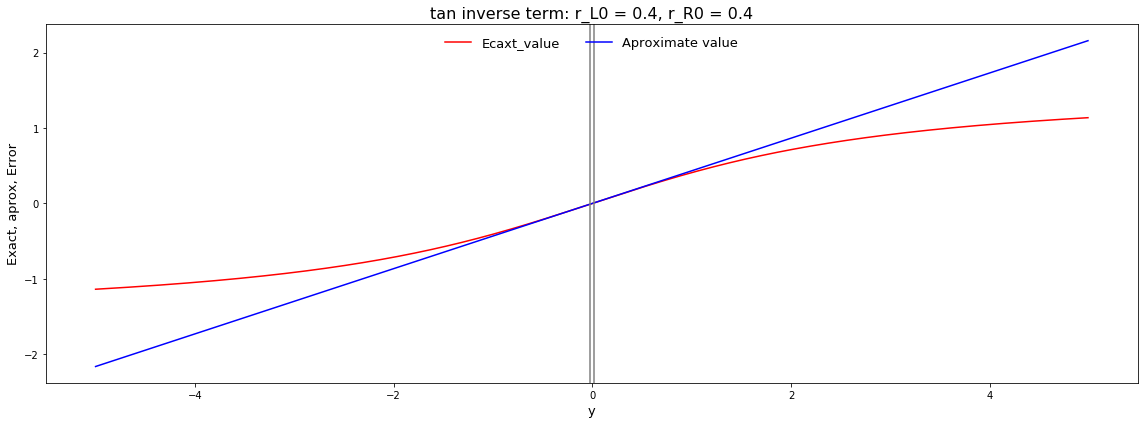

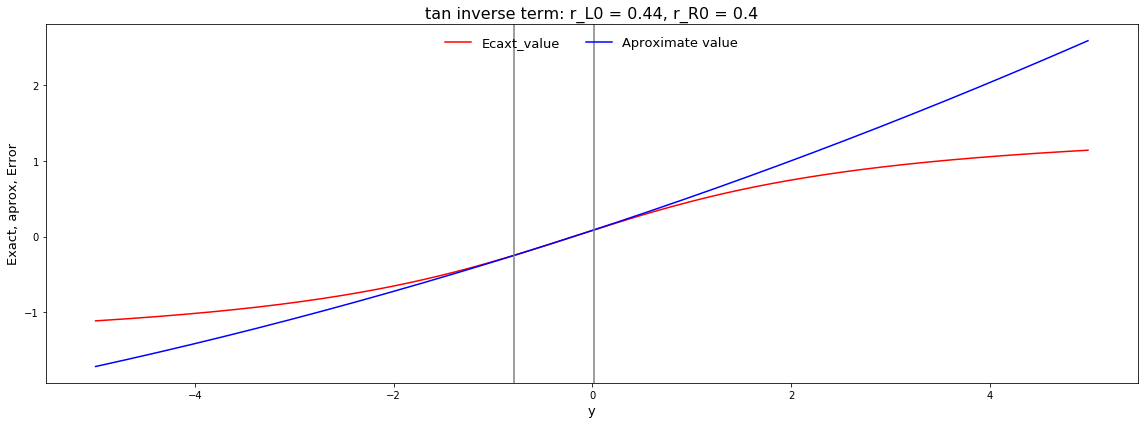

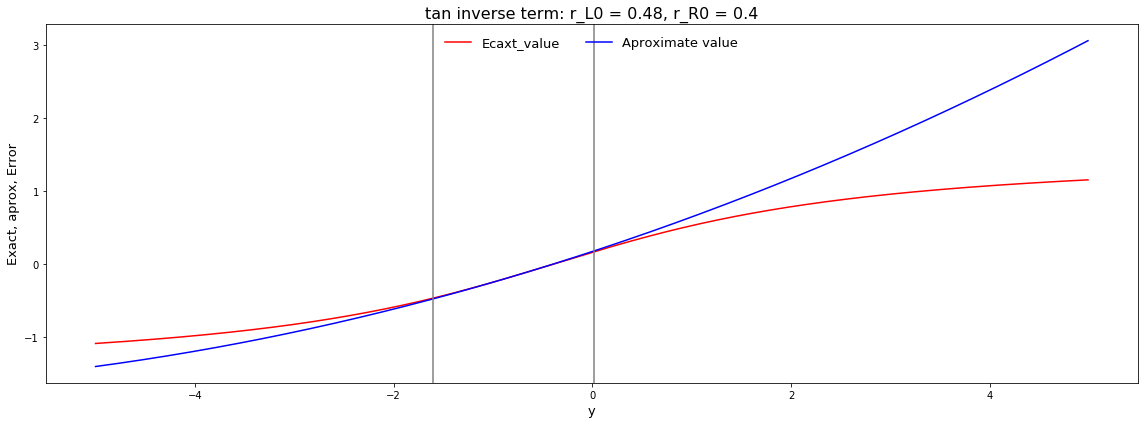

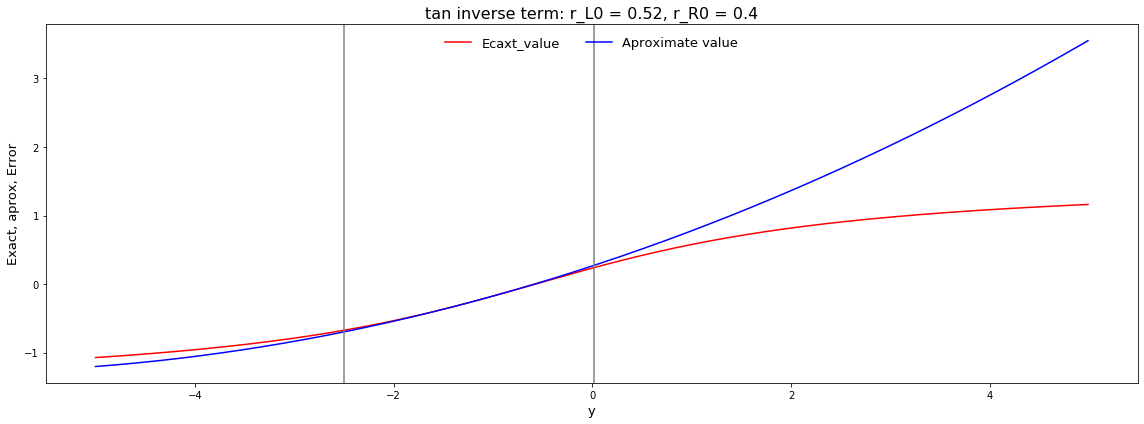

In [23]:
plt.figure(5, figsize = (16,6))
plt.plot(y_value, tan0_exact_value, "r-", linewidth = 1.5, label = 'Ecaxt_value', markerfacecolor='white')
plt.plot(y_value, tan0_aprox_value, "b-", linewidth = 1.5, label = 'Aproximate value', markerfacecolor='white')
#plt.plot(y_value, error0, "k--", linewidth = 1.5, label = 'Error', markerfacecolor='white')
plt.axvline(x=np.min(yO), color = 'grey')
plt.axvline(x=np.max(yO), color = 'grey')
plt.xlabel('y', fontsize=13)
plt.ylabel('Exact, aprox, Error', fontsize=13)
plt.legend(loc='upper center', frameon = False, ncol = 2, fontsize=13)
plt.title('tan inverse term: r_L0 = 0.4, r_R0 = 0.4', fontsize=16)
plt.tight_layout()
plt.show()

##

plt.figure(5, figsize = (16,6))
plt.plot(y_value, tan1_exact_value, "r-", linewidth = 1.5, label = 'Ecaxt_value', markerfacecolor='white')
plt.plot(y_value, tan1_aprox_value, "b-", linewidth = 1.5, label = 'Aproximate value', markerfacecolor='white')
#plt.plot(y_value, error1, "k--", linewidth = 1.5, label = 'Error', markerfacecolor='white')
plt.axvline(x=np.min(y1), color = 'grey')
plt.axvline(x=np.max(y1), color = 'grey')
plt.xlabel('y', fontsize=13)
plt.ylabel('Exact, aprox, Error', fontsize=13)
plt.legend(loc='upper center', frameon = False, ncol = 2, fontsize=13)
plt.title('tan inverse term: r_L0 = 0.44, r_R0 = 0.4', fontsize=16)
plt.tight_layout()
plt.show()

###

plt.figure(5, figsize = (16,6))
plt.plot(y_value, tan2_exact_value, "r-", linewidth = 1.5, label = 'Ecaxt_value', markerfacecolor='white')
plt.plot(y_value, tan2_aprox_value, "b-", linewidth = 1.5, label = 'Aproximate value', markerfacecolor='white')
#plt.plot(y_value, error2, "k--", linewidth = 1.5, label = 'Error', markerfacecolor='white')
plt.axvline(x=np.min(y2), color = 'grey')
plt.axvline(x=np.max(y2), color = 'grey')
plt.xlabel('y', fontsize=13)
plt.ylabel('Exact, aprox, Error', fontsize=13)
plt.legend(loc='upper center', frameon = False, ncol = 2, fontsize=13)
plt.title('tan inverse term: r_L0 = 0.48, r_R0 = 0.4', fontsize=16)
plt.tight_layout()
plt.show()

##

plt.figure(5, figsize = (16,6))
plt.plot(y_value, tan3_exact_value, "r-", linewidth = 1.5, label = 'Ecaxt_value', markerfacecolor='white')
plt.plot(y_value, tan3_aprox_value, "b-", linewidth = 1.5, label = 'Aproximate value', markerfacecolor='white')
#plt.plot(y_value, error3, "k--", linewidth = 1.5, label = 'Error', markerfacecolor='white')
plt.axvline(x=np.min(y3), color = 'grey')
plt.axvline(x=np.max(y3), color = 'grey')
plt.xlabel('y', fontsize=13)
plt.ylabel('Exact, aprox, Error', fontsize=13)
plt.legend(loc='upper center', frameon = False, ncol = 2, fontsize=13)
plt.title('tan inverse term: r_L0 = 0.52, r_R0 = 0.4', fontsize=16)
plt.tight_layout()
plt.show()


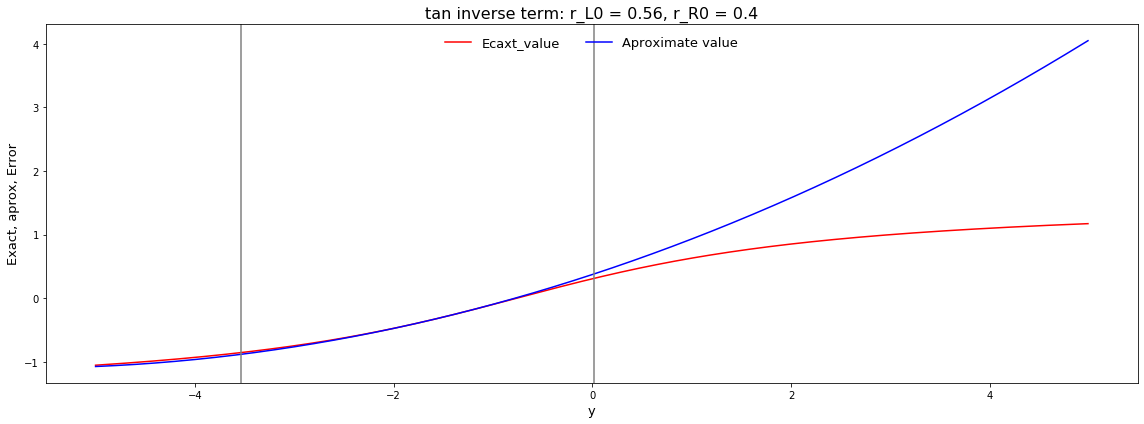

In [24]:
plt.figure(5, figsize = (16,6))
plt.plot(y_value, tan4_exact_value, "r-", linewidth = 1.5, label = 'Ecaxt_value', markerfacecolor='white')
plt.plot(y_value, tan4_aprox_value, "b-", linewidth = 1.5, label = 'Aproximate value', markerfacecolor='white')
#plt.plot(y_value, error4, "k--", linewidth = 1.5, label = 'Error', markerfacecolor='white')
plt.axvline(x=np.min(y4), color = 'grey')
plt.axvline(x=np.max(y4), color = 'grey')
plt.xlabel('y', fontsize=13)
plt.ylabel('Exact, aprox, Error', fontsize=13)
plt.legend(loc='upper center', frameon = False, ncol = 2, fontsize=13)
plt.title('tan inverse term: r_L0 = 0.56, r_R0 = 0.4', fontsize=16)
plt.tight_layout()
plt.show()

### Error Analysis for ln term

In [25]:
f2 = sp.ln((y + k1)**2 + k2)
f2

log(k2 + (k1 + y)**2)

In [26]:
df2_1 = sp.diff(f2, y, 1).simplify()
df2_2 = sp.diff(f2, y, 2).simplify()
df2_3 = sp.diff(f2, y, 3).simplify()

f20 = f2.subs(y, ye)
d21 = df2_1.subs(y, ye)
d22 = df2_2.subs(y, ye)
d23 = df2_3.subs(y, ye)

In [27]:
index = list(range(0,5))

f20_array = np.zeros(5)
d21_array = np.zeros(5)
d22_array = np.zeros(5)
d23_array = np.zeros(5)

for i in index:
    f20_array[i] = f20.subs(k1, k1_array[i]).subs(k2, k2_array[i]).subs(ye, y_eqlm[i])
    d21_array[i] = d21.subs(k1, k1_array[i]).subs(k2, k2_array[i]).subs(ye, y_eqlm[i])
    d22_array[i] = d22.subs(k1, k1_array[i]).subs(k2, k2_array[i]).subs(ye, y_eqlm[i])
    d23_array[i] = d23.subs(k1, k1_array[i]).subs(k2, k2_array[i]).subs(ye, y_eqlm[i])

In [28]:
ln0_aprox = f20_array[0] + ((y - y_eqlm[0])**1/1)*d21_array[0] + ((y - y_eqlm[0])**2/2)*d22_array[0]
ln1_aprox = f20_array[1] + ((y - y_eqlm[1])**1/1)*d21_array[1] + ((y - y_eqlm[1])**2/2)*d22_array[1]
ln2_aprox = f20_array[2] + ((y - y_eqlm[2])**1/1)*d21_array[2] + ((y - y_eqlm[2])**2/2)*d22_array[2]
ln3_aprox = f20_array[3] + ((y - y_eqlm[3])**1/1)*d21_array[3] + ((y - y_eqlm[3])**2/2)*d22_array[3]
ln4_aprox = f20_array[4] + ((y - y_eqlm[4])**1/1)*d21_array[4] + ((y - y_eqlm[4])**2/2)*d22_array[4]

ln0_aprox = ln0_aprox.simplify()
ln1_aprox = ln1_aprox.simplify()
ln2_aprox = ln2_aprox.simplify()
ln3_aprox = ln3_aprox.simplify()
ln4_aprox = ln4_aprox.simplify()

ln0_exact = f2.subs(k1, k1_array[0]).subs(k2, k2_array[0])
ln1_exact = f2.subs(k1, k1_array[1]).subs(k2, k2_array[1])
ln2_exact = f2.subs(k1, k1_array[2]).subs(k2, k2_array[2])
ln3_exact = f2.subs(k1, k1_array[3]).subs(k2, k2_array[3])
ln4_exact = f2.subs(k1, k1_array[4]).subs(k2, k2_array[4])

In [29]:
y_value = np.arange(-5, 5, 0.01)

index = list(range(0,1000))

ln0_aprox_value = np.zeros(1000)
ln1_aprox_value = np.zeros(1000)
ln2_aprox_value = np.zeros(1000)
ln3_aprox_value = np.zeros(1000)
ln4_aprox_value = np.zeros(1000)

ln0_exact_value = np.zeros(1000)
ln1_exact_value = np.zeros(1000)
ln2_exact_value = np.zeros(1000)
ln3_exact_value = np.zeros(1000)
ln4_exact_value = np.zeros(1000)

In [30]:
for i in index:
    ln0_aprox_value[i] = ln0_aprox.subs(y, y_value[i])
    ln1_aprox_value[i] = ln1_aprox.subs(y, y_value[i])
    ln2_aprox_value[i] = ln2_aprox.subs(y, y_value[i])
    ln3_aprox_value[i] = ln3_aprox.subs(y, y_value[i])
    ln4_aprox_value[i] = ln4_aprox.subs(y, y_value[i])
    ####
    ln0_exact_value[i] = ln0_exact.subs(y, y_value[i])
    ln1_exact_value[i] = ln1_exact.subs(y, y_value[i])
    ln2_exact_value[i] = ln2_exact.subs(y, y_value[i])
    ln3_exact_value[i] = ln3_exact.subs(y, y_value[i])
    ln4_exact_value[i] = ln4_exact.subs(y, y_value[i])

In [31]:
error20 = ln0_exact_value - ln0_aprox_value
error21 = ln1_exact_value - ln1_aprox_value
error22 = ln2_exact_value - ln2_aprox_value
error23 = ln3_exact_value - ln3_aprox_value
error24 = ln4_exact_value - ln4_aprox_value

In [32]:
y_value[np.argmin(abs(error20))]

-1.0658141036401503e-13

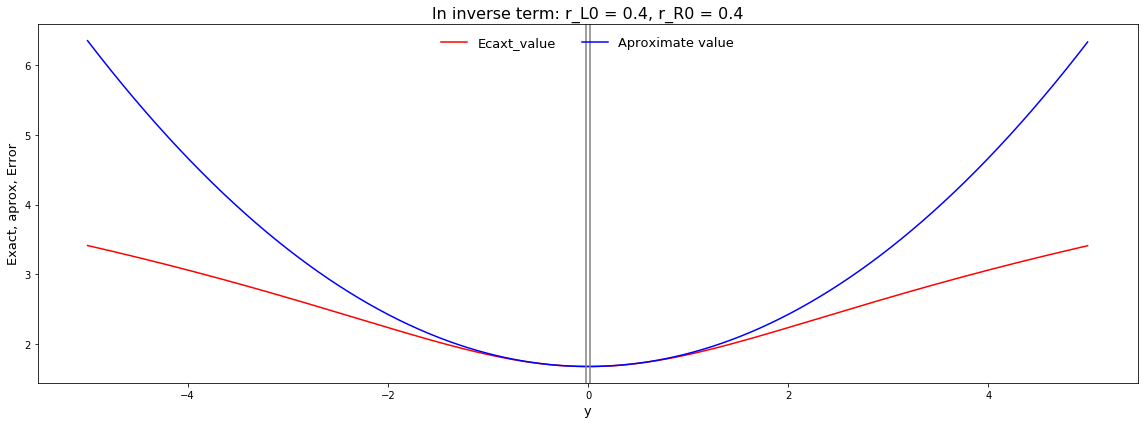

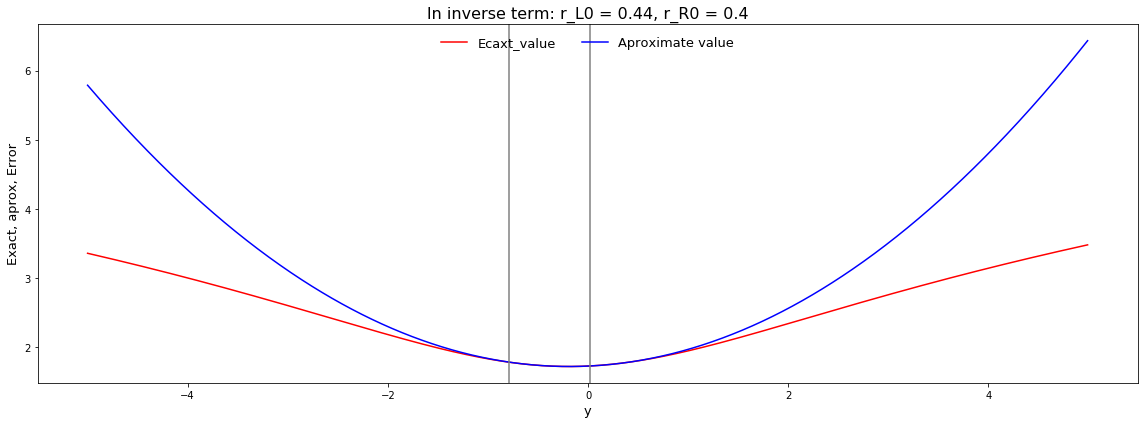

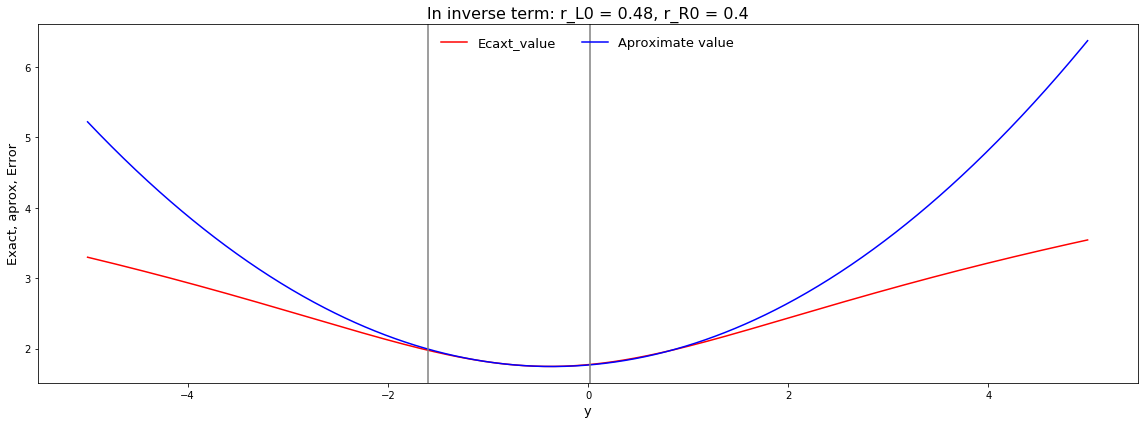

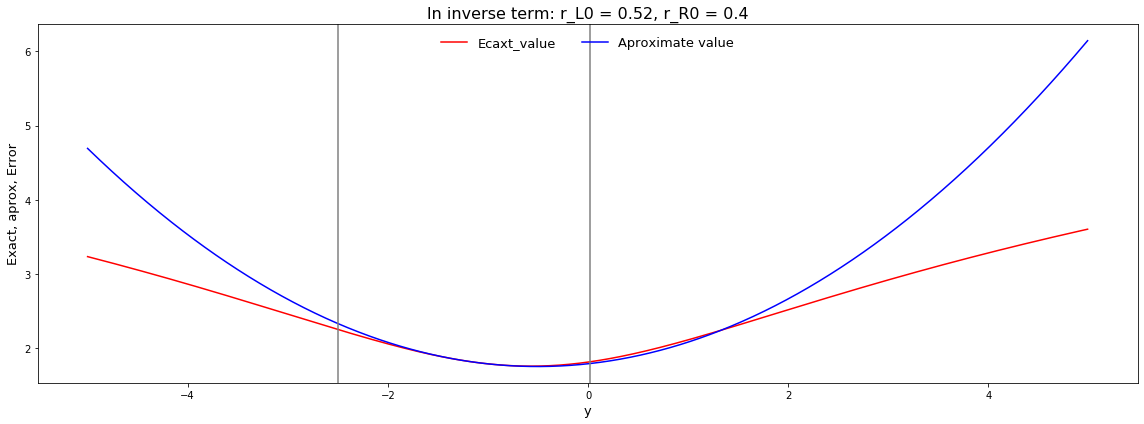

In [33]:
plt.figure(5, figsize = (16,6))
plt.plot(y_value, ln0_exact_value, "r-", linewidth = 1.5, label = 'Ecaxt_value', markerfacecolor='white')
plt.plot(y_value, ln0_aprox_value, "b-", linewidth = 1.5, label = 'Aproximate value', markerfacecolor='white')
#plt.plot(y_value, error20, "k--", linewidth = 1.5, label = 'Error', markerfacecolor='white')
plt.axvline(x=np.min(yO), color = 'grey')
plt.axvline(x=np.max(yO), color = 'grey')
plt.xlabel('y', fontsize=13)
plt.ylabel('Exact, aprox, Error', fontsize=13)
plt.legend(loc='upper center', frameon = False, ncol = 2, fontsize=13)
plt.title('ln inverse term: r_L0 = 0.4, r_R0 = 0.4', fontsize=16)
plt.tight_layout()
plt.show()

##

plt.figure(5, figsize = (16,6))
plt.plot(y_value, ln1_exact_value, "r-", linewidth = 1.5, label = 'Ecaxt_value', markerfacecolor='white')
plt.plot(y_value, ln1_aprox_value, "b-", linewidth = 1.5, label = 'Aproximate value', markerfacecolor='white')
#plt.plot(y_value, error21, "k--", linewidth = 1.5, label = 'Error', markerfacecolor='white')
plt.axvline(x=np.min(y1), color = 'grey')
plt.axvline(x=np.max(y1), color = 'grey')
plt.xlabel('y', fontsize=13)
plt.ylabel('Exact, aprox, Error', fontsize=13)
plt.legend(loc='upper center', frameon = False, ncol = 2, fontsize=13)
plt.title('ln inverse term: r_L0 = 0.44, r_R0 = 0.4', fontsize=16)
plt.tight_layout()
plt.show()

###

plt.figure(5, figsize = (16,6))
plt.plot(y_value, ln2_exact_value, "r-", linewidth = 1.5, label = 'Ecaxt_value', markerfacecolor='white')
plt.plot(y_value, ln2_aprox_value, "b-", linewidth = 1.5, label = 'Aproximate value', markerfacecolor='white')
#plt.plot(y_value, error22, "k--", linewidth = 1.5, label = 'Error', markerfacecolor='white')
plt.axvline(x=np.min(y2), color = 'grey')
plt.axvline(x=np.max(y2), color = 'grey')
plt.xlabel('y', fontsize=13)
plt.ylabel('Exact, aprox, Error', fontsize=13)
plt.legend(loc='upper center', frameon = False, ncol = 2, fontsize=13)
plt.title('ln inverse term: r_L0 = 0.48, r_R0 = 0.4', fontsize=16)
plt.tight_layout()
plt.show()

##

plt.figure(5, figsize = (16,6))
plt.plot(y_value, ln3_exact_value, "r-", linewidth = 1.5, label = 'Ecaxt_value', markerfacecolor='white')
plt.plot(y_value, ln3_aprox_value, "b-", linewidth = 1.5, label = 'Aproximate value', markerfacecolor='white')
#plt.plot(y_value, error23, "k--", linewidth = 1.5, label = 'Error', markerfacecolor='white')
plt.axvline(x=np.min(y3), color = 'grey')
plt.axvline(x=np.max(y3), color = 'grey')
plt.xlabel('y', fontsize=13)
plt.ylabel('Exact, aprox, Error', fontsize=13)
plt.legend(loc='upper center', frameon = False, ncol = 2, fontsize=13)
plt.title('ln inverse term: r_L0 = 0.52, r_R0 = 0.4', fontsize=16)
plt.tight_layout()
plt.show()


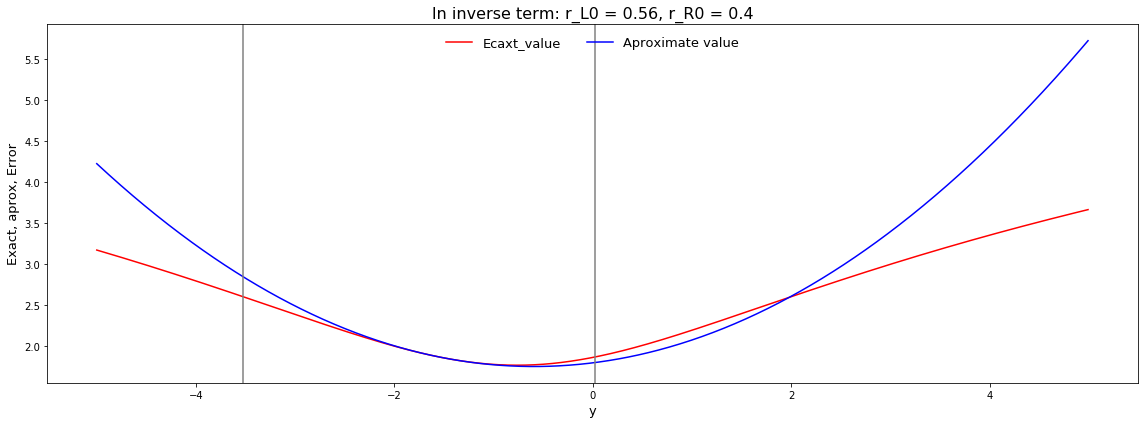

In [34]:
plt.figure(5, figsize = (16,6))
plt.plot(y_value, ln4_exact_value, "r-", linewidth = 1.5, label = 'Ecaxt_value', markerfacecolor='white')
plt.plot(y_value, ln4_aprox_value, "b-", linewidth = 1.5, label = 'Aproximate value', markerfacecolor='white')
#plt.plot(y_value, error24, "k--", linewidth = 1.5, label = 'Error', markerfacecolor='white')
plt.axvline(x=np.min(y4), color = 'grey')
plt.axvline(x=np.max(y4), color = 'grey')
#plt.axhline(y=0, color = 'grey')
plt.xlabel('y', fontsize=13)
plt.ylabel('Exact, aprox, Error', fontsize=13)
plt.legend(loc='upper center', frameon = False, ncol = 2, fontsize=13)
plt.title('ln inverse term: r_L0 = 0.56, r_R0 = 0.4', fontsize=16)
plt.tight_layout()
plt.show()